# Heart Disease Prediction Using Machine Learning

## Aim of the project

The primary aim of heart disease prediction using machine learning is to develop an efficient system capable of identifying the risk of heart disease based on health parameters. This enables early detection, allowing timely medical intervention and lifestyle modifications to prevent severe outcomes. By leveraging machine learning, the system assists healthcare professionals in making accurate diagnoses, personalizing treatment plans, and optimizing resource utilization. Additionally, it offers a cost-effective and non-invasive alternative to traditional diagnostic methods, ultimately improving patient outcomes and reducing the burden of cardiovascular diseases.

## Dataset Details

dataset link->https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Dataset Description

1. age
2. sex    
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pickle

In [2]:
#Loading the dataset

df = pd.read_csv('/content/Heart Disease Analysis.csv')

In [ ]:
#Checking the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#Checking the last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#Columns or features in the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#Describe the DataFrame
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Size of the dataset
df.shape

(1025, 14)

## Data Preprocessing

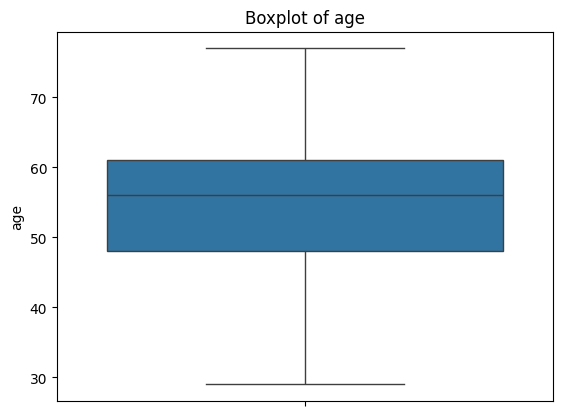

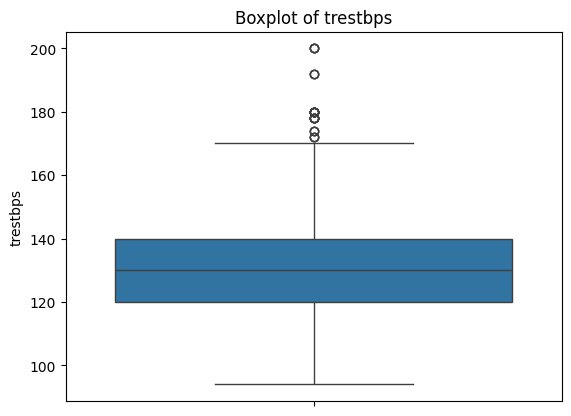

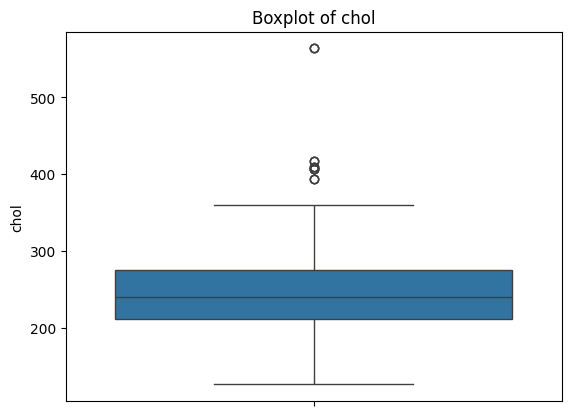

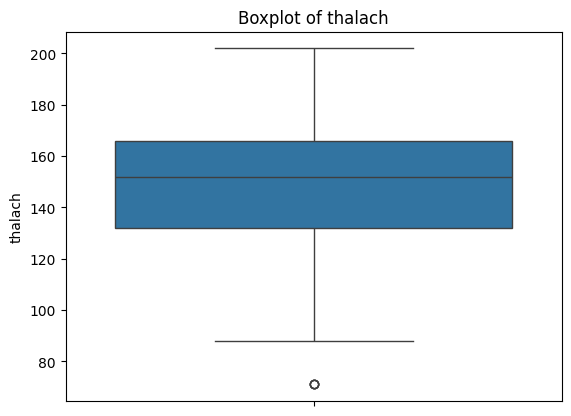

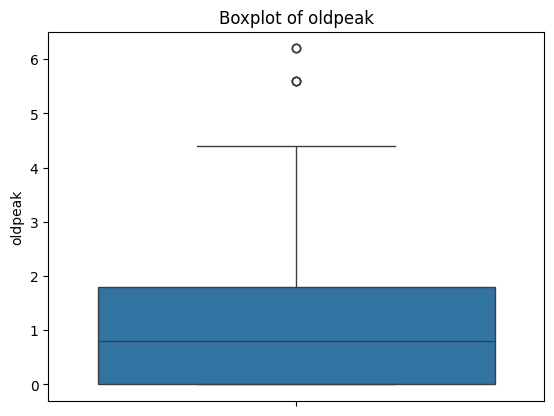

In [ ]:
# Visualize outliers for numeric columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Remove Outliners

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
#Dataset Size after preprocessing
df.shape

(964, 14)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Exploratory Data Analysis

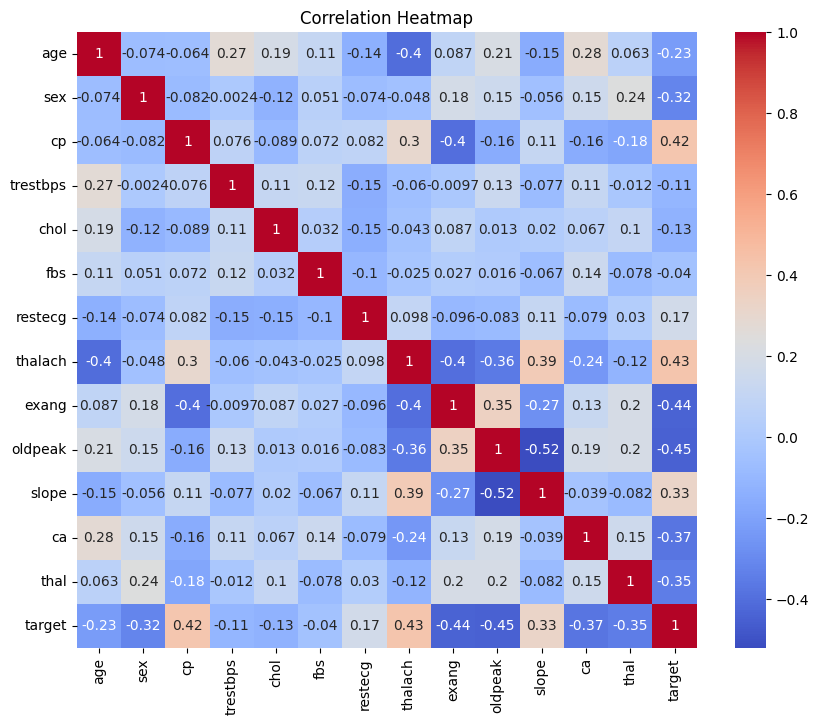

In [ ]:
# Correlation heatmap

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap provides insights into the relationships between features in the dataset and their impact on heart disease prediction. Key features positively correlated with heart disease include chest pain type (cp), maximum heart rate achieved (thalach), and the slope of the ST segment (slope). These indicate that higher chest pain type values, higher maximum heart rates, and specific ST segment slopes are strong predictors of heart disease. On the other hand, features such as exercise-induced angina (exang), ST depression induced by exercise (oldpeak), number of major vessels colored by fluoroscopy (ca), and thalassemia (thal) show strong negative correlations, suggesting that their higher values are associated with a lower likelihood of heart disease. Features like cholesterol levels (chol) and fasting blood sugar (fbs) exhibit weak or negligible correlations with the target variable, making them less significant for prediction.

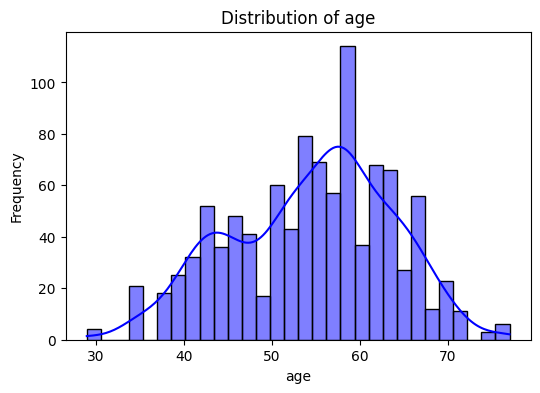

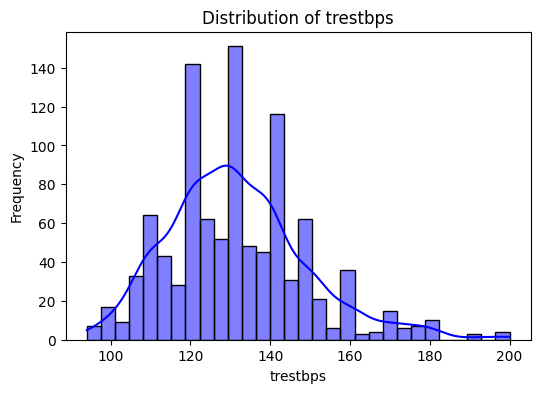

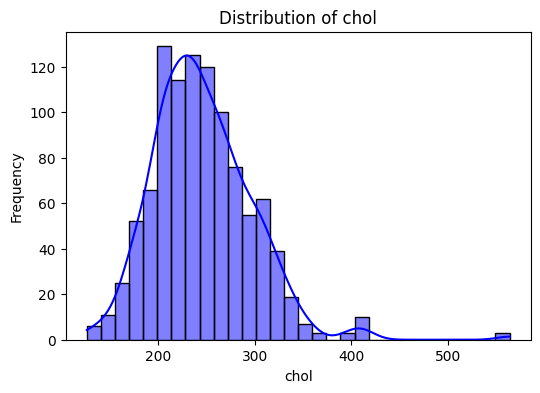

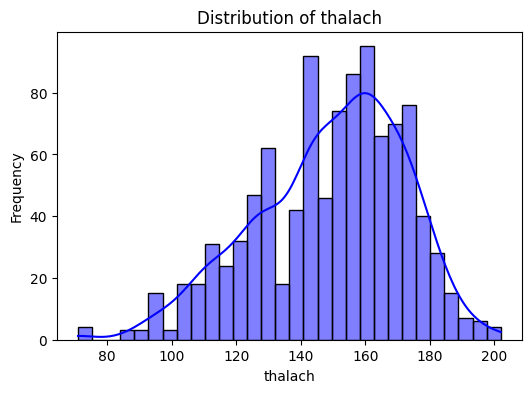

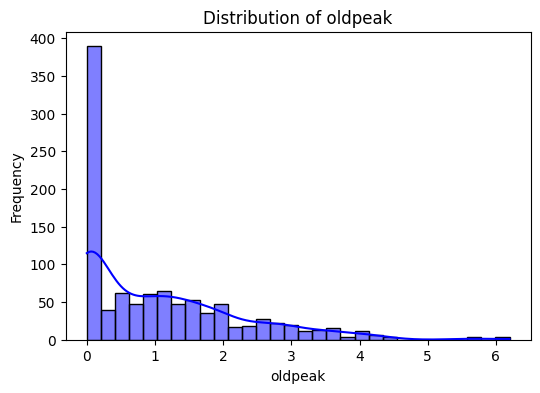

In [6]:
# Histograms for numerical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

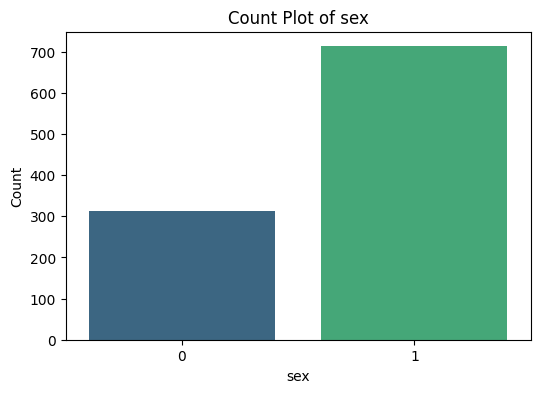

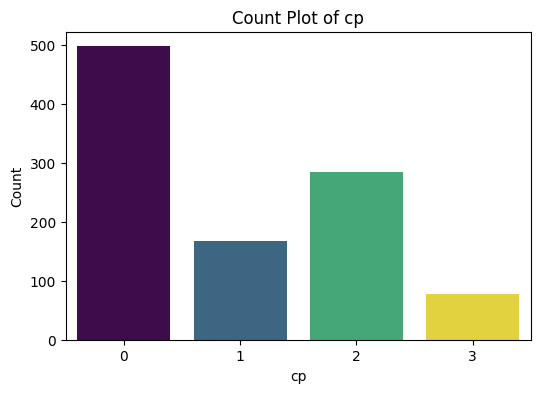

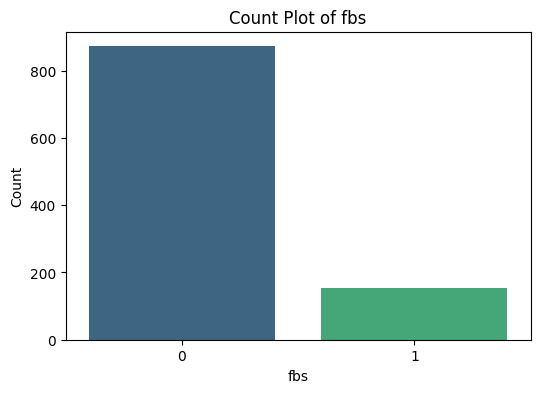

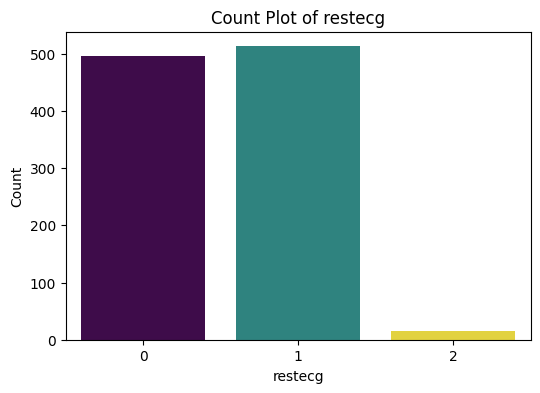

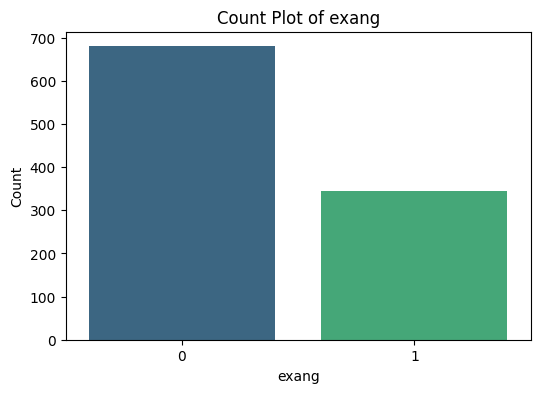

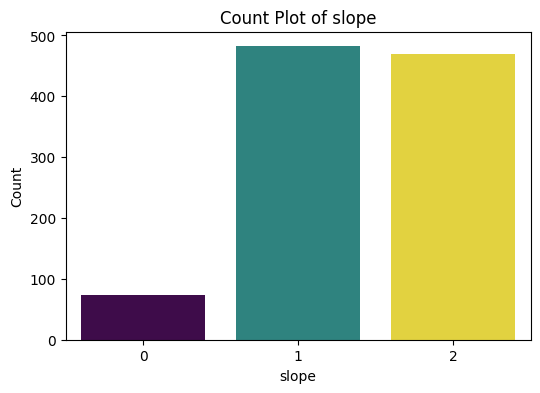

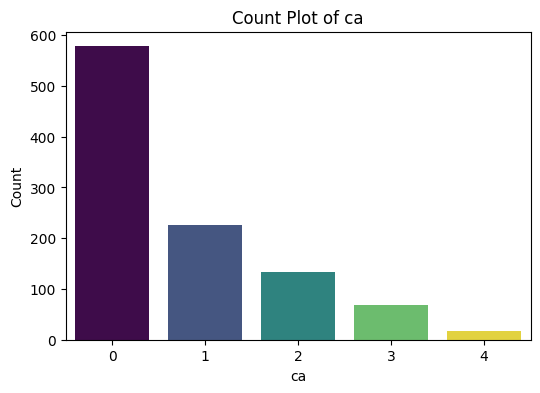

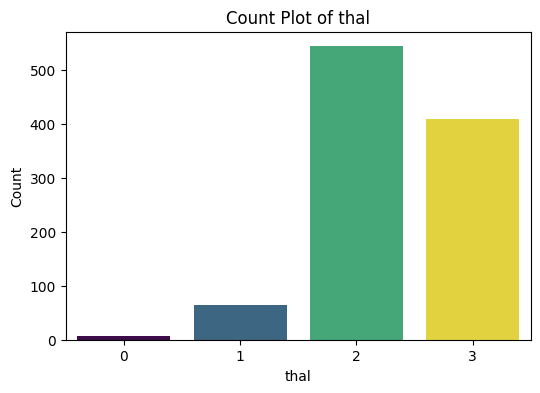

In [3]:
# Bar plots for categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

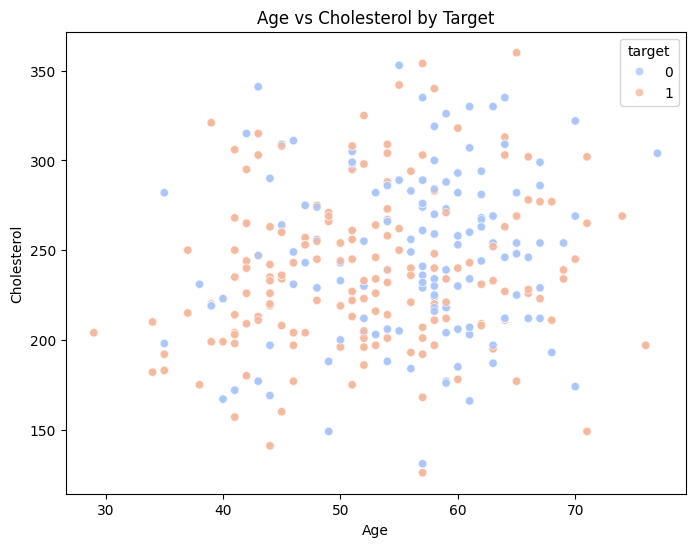

In [ ]:
#Age and Cholesterol by Target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm', alpha=0.8)
plt.title('Age vs Cholesterol by Target')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

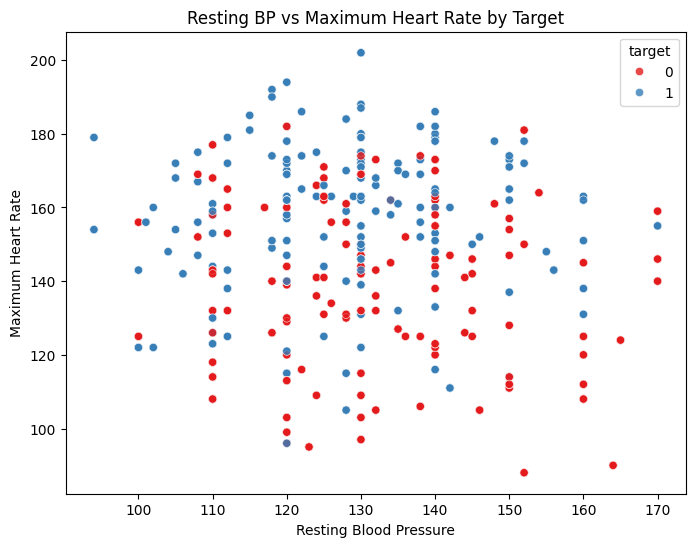

In [ ]:
# Resting Blood Pressure and Maximum Heart Rate by Target
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='trestbps', y='thalach', hue='target', palette='Set1', alpha=0.8)
plt.title('Resting BP vs Maximum Heart Rate by Target')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate')
plt.show()

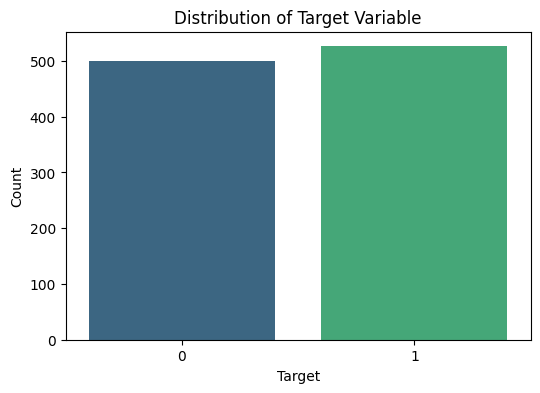

In [4]:
# Count plot for the target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target', palette='viridis', legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [7]:
# Standazation of the data

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


## Splitting the data

In [9]:
X = df.drop('target', axis = 1)
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Selection and Evaluation

1. Linear Models
2. Random Forest Classifier
3. Support Vector Machines
4. Naive Bayes Classifier
5. K-Neart Neighbors

In [11]:
# Fuction for Evaluating the each model

def evaluate_models(X_train, X_test, y_train, y_test):
  # Define the models

  models = {
      'Logistic Regression': LogisticRegression(),
      'Random Forest': RandomForestClassifier(),
      'Support Vector Machine': SVC(),
      'Naive Bayes': GaussianNB(),
      'K-Nearest Neighbors': KNeighborsClassifier()
  }

  # Created a DataFrame to store metrics
  metrics_list = []
  #metrics_table = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1-Score'])

  for name, model in models.items():
    #Train the model
    model.fit(X_train, y_train)

    #Predict on the test set
    y_pred = model.predict(X_test)

    #Checking the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #Append the metrics to the table
    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1
    })

  metrics_table = pd.DataFrame(metrics_list)

  metrics_table.index = range(1, len(metrics_table)+1)

  return metrics_table

In [12]:
result = evaluate_models(X_train, X_test, y_train, y_test)

print(result)

                    Model  Accuracy  Precision  Recall  F1_score
1     Logistic Regression  0.789883   0.748252   0.856  0.798507
2           Random Forest  0.988327   1.000000   0.976  0.987854
3  Support Vector Machine  0.852140   0.800000   0.928  0.859259
4             Naive Bayes  0.793774   0.750000   0.864  0.802974
5     K-Nearest Neighbors  0.793774   0.757143   0.848  0.800000
